Time signal value generated
[0.0000e+00 1.0000e-04 2.0000e-04 ... 9.9997e+00 9.9998e+00 9.9999e+00]
[ 0.          1.69996255  0.99952682 ... -0.17612288 -1.83372675
 -1.25172146]


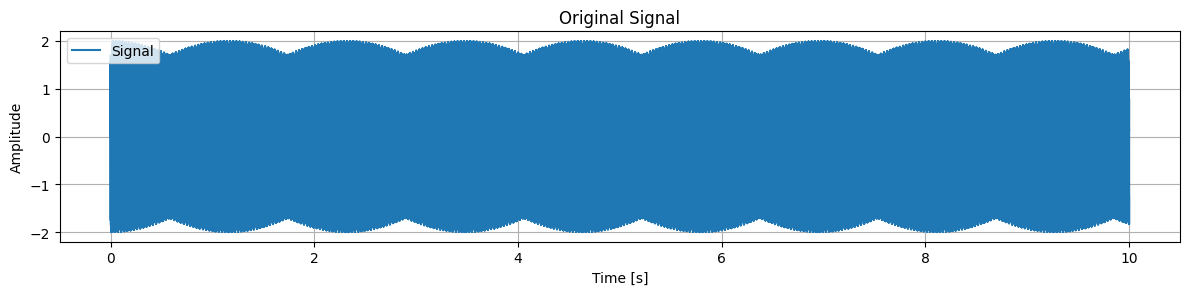

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.signal.windows import hamming

# Generate a sample frequency
fs = 10000 # Sample frequency
t = np.linspace(0, 10, 10 * fs, endpoint=False) #The time array
f1 = 1234 # First frequency component
f2 = 2500.2157
amp1 = 2.82842712474619
amp2 = 1

ulsb = 1e-3
twopi = 1*np.pi
signal = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t)


print("Time signal value generated")
print(t)
print(signal)


# Plot the original signal
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, signal, label='Signal')
plt.title('Original Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

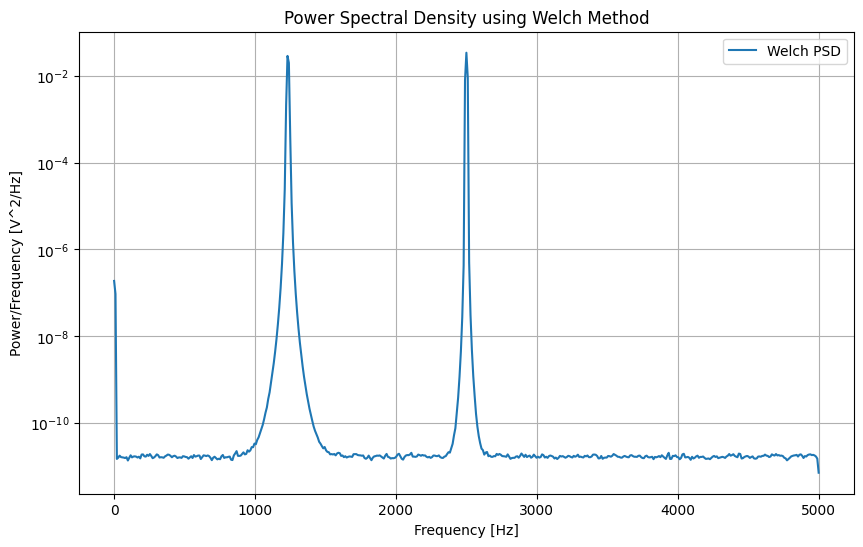

In [39]:
def roundToNearest(value, ulsb): #Rounding to the nearest value
    return np.floor(value/ulsb + 0.5)*ulsb

roundedSignal = roundToNearest(signal, ulsb)

# Parameters for Welch's method
nperseg = 1024  # Length of each segment
noverlap = nperseg // 2  # Overlap between segments
frequencies, psd = welch(roundedSignal, fs, nperseg=nperseg, noverlap= noverlap, scaling='density') #Frequnecies of the signal

# Plot the final PSD estimate
plt.figure(figsize=(10, 6))
plt.semilogy(frequencies, psd, label='Welch PSD')
plt.title('Power Spectral Density using Welch Method')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power/Frequency [V^2/Hz]')
plt.grid(True)
plt.legend()
plt.show()

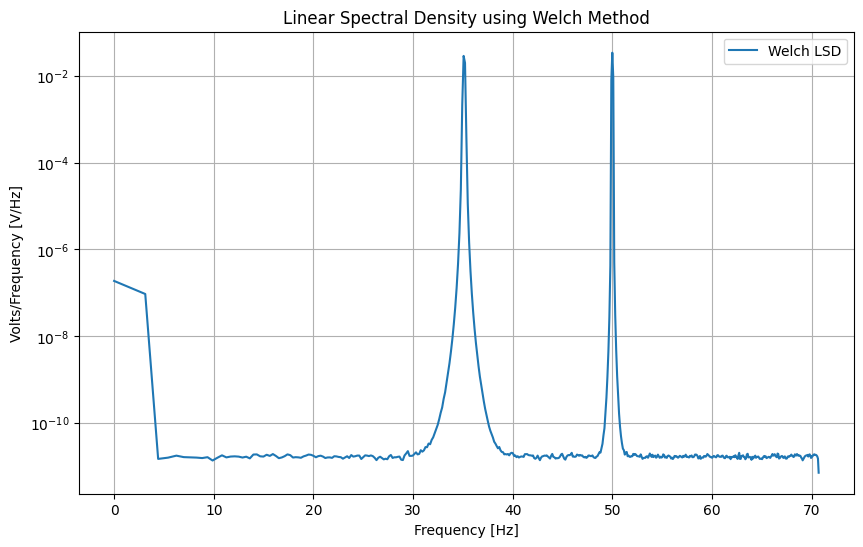

In [40]:
frenquenciesSqrt = np.sqrt(frequencies)
# Plot the final PSD estimate
plt.figure(figsize=(10, 6))
plt.semilogy(frenquenciesSqrt, psd, label='Welch LSD')
plt.title('Linear Spectral Density using Welch Method')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Volts/Frequency [V/Hz]')
plt.grid(True)
plt.legend()
plt.show()